# AI4Omics Practical Session

## Task 2 - Introduction to Logistic Regression

Before we start, please, execute the following code to be ready for exercises.

- Import pandas and several scikit-learn modules that will be used in the exercises:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

- Define the function `calculate_accuracy`:

In [2]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train), 'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

- Import data and create targets **y**:

In [3]:
random_state = 42
data = pd.read_csv('../data/colon_cancer.csv', sep=';', index_col='id_sample')
print('data', data.shape)
y = data['tissue_status']
print('y', y.shape)

data (804, 61)
y (804,)


## Question 1. Create a dataframe X including all the available features (genes)

The original dataset **data** contains 60 columns with the expression levels of 60 genes and one column `tissue_status` with the sample types (normal or tumoral).

- Extract 60 columns corresponding to gene expression levels from **data** to a separate dataframe **X**.

Hint: you can use one of the methods `select_dtypes('number')` or `drop(columns=['tissue_status'])`. Please check the documentation of pandas for these two methods if you are not familiar with them.

In [4]:
# X = data... # to complete
X = data.select_dtypes('number')

## Question 2. Create train and test datasets with 3/4 and 1/4 of samples respectively

- Create a training dataset **X_train** and a test dataset **X_test** with their corresponding targets **y_train** and **y_test**.

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=..., random_state=random_state, stratify=y) # test_size to define
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=random_state, stratify=y)

- How many samples contain the obtained train and test datasets?

Hint: you can use `shape` attribute of the dataframe.

In [6]:
# print('Train:', X_train..., 'Test:', X_test...) # to complete
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (603, 60) Test: (201, 60)


## Question 3. Perform a standardisation of data

*Data standardisation* is a typical and often mandatory step in a machine learning pipeline. Data standardisation is a *feature scaling* technique aiming to convert original data, where multiple features can be spanning varying ranges and degrees of magnitude, into a comparable range of values. The data standardisation significantly improves the performance of many machine learning algorithms.

The most common standardisation technique is *Z-score* (or standard score) where the values are centered around the mean with a unit standard deviation.  

**Warning!** The calculation of the mean $\mu$ and the standard deviation $\sigma$ must be performed **on the training dataset** only. The test dataset should not be used in the calculation. It will be scaled using the values $\mu$ and $\sigma$ obtained in the training dataset.

In `scikit-learn`, data standardisation can be realized with a `StandardScaler` object. 

- Execute the following code to calculate $\mu$ and $\sigma$ for **X_train** dataset.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create a scaler
scaler.fit(X_train) # calculate mu and sigma on X_train (only training dataset should be used!)

StandardScaler()

- Display $\mu$ (mean) values

In [26]:
# Display calculated mu (mean) for each feature
print('Mean mu', scaler.mean_)

Mean mu [4.57607731 4.51357044 7.2181844 ]


- Display $\sigma$ (standard deviation) values

In [27]:
# Display calculated sigma (standard deviation) for each feature
print('Std sigma', scaler.scale_)

Std sigma [1.48007846 1.61344614 1.41109107]


Now, we can use $\mu$ and $\sigma$ calculated from **X_train** dataset to perform a standardisation of both **X_train** and **X_test**. Use the `transform` method of the `scaler`object. As a result, you should obtain two scaled datasets: **X_train_scaled** and **X_test_scaled**.

- Execute the code for **X_train**:

In [10]:
# To execute
X_train_scaled = scaler.transform(X_train) # numpy object
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) # convert to pandas DataFrame format

- Complete a similar code for **X_test** and execute it:

In [11]:
# X_test_scaled = scaler.transform(...) # to complete
X_test_scaled = scaler.transform(X_test)

# X_test_scaled = pd.DataFrame(X_test_scaled, index=...index, columns=...columns) # to complete
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

After the standardisation, the mean values of expression levels should be equal to 0 for all genes in **X_train_scaled**, and the standard deviation should be equal to 1.

- Check that the mean values are 0 for the first 5 features in **X_train_scaled**

In [12]:
# X_train_scaled... # to complete
X_train_scaled.mean().head()

ADH1C     7.070077e-17
DHRS11   -1.414015e-16
UGP2     -6.598739e-16
SLC7A5   -1.178346e-16
CTSS      1.089970e-16
dtype: float64

- Check that the standard deviations are 1 for the first 5 features in **X_train_scaled**

In [13]:
# X_train_scaled... # to complete
X_train_scaled.std().head()

ADH1C     1.00083
DHRS11    1.00083
UGP2      1.00083
SLC7A5    1.00083
CTSS      1.00083
dtype: float64

## Question 4. Create a model of Logistic Regression (LR)

Logistic regression uses an analytical function, called *logistic function* or *sigmoid function*, which has a characteristic S-shape. By optimizing the coefficients of this function (max likelihood or min cross-entropy), it makes it possible to estimate the probability for a sample to belong to this or that class. For example, tumoral versus normal.

<img src="logistic_regression.png" alt="Logistic regression" width="600" aling="center">

- Create a Logistic Regression classifier

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=random_state, penalty='none')
print(classifier)

LogisticRegression(penalty='none', random_state=42)


- Train the classifier and calculate its accuracy using `calculate_accuracy` function

In [15]:
# accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, ... , ... , y_train, y_test) # to complete
accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled, X_test_scaled, y_train, y_test)

Train accuracy: 1.000 Test accuracy: 1.000


## Question 5. Display a confusion matrix for LR algorithm

A *confusion matrix* is a table that allows visualisation of the performance of a supervised algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

- Display a confusion maxtrix for LR algorithm **using the test dataset only** 

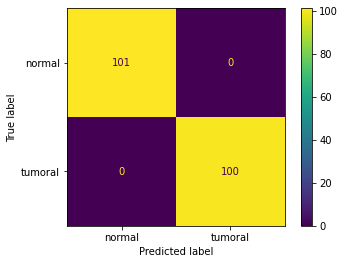

In [16]:
# metrics.plot_confusion_matrix(trained_classifier, ... , ...) # to complete
metrics.plot_confusion_matrix(trained_classifier, X_test_scaled, y_test)

## Question 6. Evaluate the impact of each gene in LR classifier

After the training phase, it is possible to know the coefficients $\beta$ of LR model for each feature (gene). They are available in the `coef_` attribute. The greater is the coefficient $\beta$ (in absolute value), the greater is the impact of the corresponding gene in the model. By analysing the coefficients $\beta$ of the trained LR model, we can find the most predictive genes.

- Display the coefficients $\beta$ for the first 5 features.

In [17]:
coefficients = pd.DataFrame(trained_classifier.coef_[0], index=X_train_scaled.columns, columns=['beta'])
coefficients.head()

,beta
ADH1C,-1.095463
DHRS11,-1.412367
UGP2,-2.444311
SLC7A5,3.980374
CTSS,-0.411723


- Display the coefficients $\beta$ as a *barplot* from the smallest to the biggest value.

<AxesSubplot:>

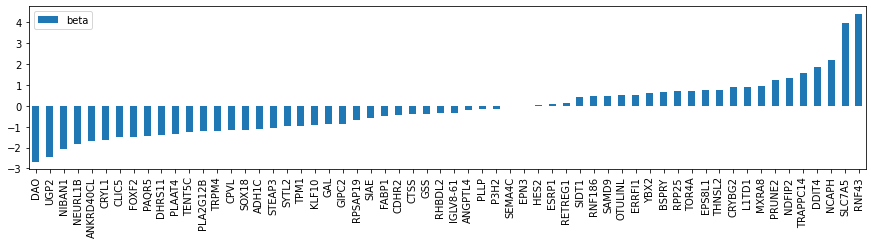

In [18]:
coefficients = coefficients.sort_values(by='beta')
coefficients.plot.bar(figsize=(15, 3))

- What genes have the most important impact in the model?

- What genes have almost no impact on the prediction? 

- Select the best 3 features mostly impacting the model

In [19]:
n_features = 3
coefficients['abs_beta'] = coefficients['beta'].abs() # calculate the absolute values of betas
coefficients = coefficients.sort_values(by='abs_beta', ascending=False) # sort by arsolute values
top_features = list(coefficients.head(n_features).index) # list of N top features
print('Top features of LR:', top_features)

Top features of LR: ['RNF43', 'SLC7A5', 'DAO']


## Question 7. Calculate the performance of LR model using 1, 2, ... N top features

- What does the code below calculate? Execute it and explain the result. 

In [20]:
for i in range(len(top_features)):
    selected_features = top_features[0:i+1]
    print(selected_features)
    accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled[selected_features], X_test_scaled[selected_features], y_train, y_test)

['RNF43']
Train accuracy: 0.919 Test accuracy: 0.841
['RNF43', 'SLC7A5']
Train accuracy: 0.964 Test accuracy: 0.935
['RNF43', 'SLC7A5', 'DAO']
Train accuracy: 0.992 Test accuracy: 0.990


- Do we need all the 60 genes in the model? What do you think? If we can reduce the number of features, how many should we keep? 

## Question 8. Case study

The *AI-Hospital* has developed a new diagnostic tool for colon cancer based on the expression levels of a panel of 3 genes. This tool produced the following measurements for a new patient arrived in the hospital:

In [21]:
panel = ['RNF43', 'SLC7A5', 'DAO']

In [22]:
new_patient = {'RNF43': 4.68, 'SLC7A5': 4.10, 'DAO': 7.59}

- **Does this patient have a colon cancer?**

Hint: To answer this question, train a LR model on the totality of available data **X**. In this case, **X_train** will contain all the samples of **X**. **X_test** will have only one sample corresponding to the new patient. Do not forget to scale the data properly, `fit` on **X_train** only and then  `transform` on both **X_train** and **X_test**.

In [23]:
X_train = data[panel]
y_train = y
X_train.head(3)

,RNF43,SLC7A5,DAO
id_sample,,,
EPSM-COLON-0001,4.241267,3.864253,8.465133
EPSM-COLON-0002,4.002000,3.069581,8.159814
EPSM-COLON-0003,3.447174,3.188257,8.004194


In [24]:
X_test = pd.DataFrame([new_patient], index=['new_patient'])
X_test

,RNF43,SLC7A5,DAO
new_patient,4.68,4.1,7.59


In [25]:
# Code to write by yourself

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = LogisticRegression(random_state=random_state, penalty='none')
classifier.fit(X_train_scaled, y_train)
y_new_patient = classifier.predict(X_test_scaled)
print(classifier, y_new_patient)

LogisticRegression(penalty='none', random_state=42) ['normal']
